In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr
from feature_engine import missing_data_imputers as msi
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from feature_selector import FeatureSelector
%matplotlib inline

In [2]:
df = pd.read_csv('nycbronx.csv', parse_dates=True)

In [3]:
#What are number of rows and columns
df.shape

(1424569, 5)

In [4]:
#Are there any suspicious variables?
df.columns.values

array(['borough', 'city', 'complaint_type', 'incident_address',
       'incident_zip'], dtype=object)

In [5]:
#Display the variable formats
df.dtypes

borough              object
city                 object
complaint_type       object
incident_address     object
incident_zip        float64
dtype: object

In [6]:
#Print the observations
df.head()

,borough,city,complaint_type,incident_address,incident_zip
0,BRONX,BRONX,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0
1,BRONX,BRONX,DOOR/WINDOW,2414 EAST TREMONT AVENUE,10461.0
2,BRONX,BRONX,SAFETY,488 EAST 163 STREET,10451.0
3,BRONX,BRONX,HEAT/HOT WATER,1505 TOWNSEND AVENUE,10452.0
4,BRONX,BRONX,HEAT/HOT WATER,1390 PROSPECT AVENUE,10459.0


In [ ]:
df['borough'].value_counts(sort=False)

In [ ]:
df['city'].value_counts(sort=False)

In [ ]:
df['complaint_type'].value_counts(sort=False)

In [ ]:
df['incident_address'].value_counts(sort=False)

In [ ]:
df['incident_zip'].value_counts(sort=False)

In [ ]:
df.isnull().sum()

In [ ]:
df[df['complaint_type'] == 'HEAT/HOT WATER'].count()

In [ ]:
stats = df[df['complaint_type'] == 'HEAT/HOT WATER'].groupby('incident_zip')
stats.count()

In [ ]:
plt.figure(figsize=(20,10))
df['incident_zip'].value_counts().plot.bar()
plt.xlabel('Zip Codes', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Bronx Bar Chart by Zip Code', size=20)

In [ ]:
df2 = pd.read_csv('bronxmodified.csv')

In [ ]:
#What are number of rows and columns
df2.shape

In [ ]:
#Are there any suspicious variables?
df2.columns.values

In [ ]:
#Display the variable formats
df.dtypes

In [ ]:
#Print the observations
df2.head()

In [ ]:
df2['Address'].value_counts(sort=False)

In [ ]:
df2['Address'].value_counts(sort=False)

In [ ]:
df2['NumBldgs'].value_counts(sort=False)

In [ ]:
df2['NumFloors'].value_counts(sort=False)

In [ ]:
df2['YearBuilt'].value_counts(sort=False)

In [ ]:
df2['YearAlter1'].value_counts(sort=False)

In [ ]:
df2['incident_zip'].value_counts(sort=False)

In [ ]:
df2.isnull().sum()

In [ ]:
stats = df.groupby(['incident_zip'], as_index=True) 
stats.count()

In [ ]:
stats2 = df2.groupby(['incident_zip'], as_index=True) 
stats2.count()

In [ ]:
plt.figure(figsize=(20,10))
df2['incident_zip'].value_counts().plot.bar()
plt.xlabel('Zip Codes', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Bronx PLUTO Bar Chart by Zip Code', size=20)

In [ ]:
sns.pairplot(df2)

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.incident_zip, hue=df.complaint_type=="HEAT/HOT WATER")

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df2.incident_zip)

***

In [7]:
df4 = pd.read_csv("NYC Bronx - 50k dataset.csv")

In [8]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19609759 entries, 0 to 19609758
Data columns (total 8 columns):
complaint_type      object
incident_address    object
incident_zip        int64
Address             object
NumBldgs            int64
NumFloors           float64
YearBuilt           int64
YearAlter1          int64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.2+ GB


In [4]:
df4.head()

,complaint_type,incident_address,incident_zip,Address,NumBldgs,NumFloors,YearBuilt,YearAlter1
0,SAFETY,488 EAST 163 STREET,10451,2441 3 AVENUE,2,5.0,1917,2008
1,SAFETY,488 EAST 163 STREET,10451,200 EAST 135 STREET,5,4.0,2000,0
2,SAFETY,488 EAST 163 STREET,10451,220 EAST 134 STREET,1,6.0,1955,0
3,SAFETY,488 EAST 163 STREET,10451,2417 3 AVENUE,1,8.0,1928,0
4,SAFETY,488 EAST 163 STREET,10451,2413 3 AVENUE,1,5.0,1931,0


In [9]:
df4.shape

(19609759, 8)

In [10]:
df4.columns.values

array(['complaint_type', 'incident_address', 'incident_zip', 'Address',
       'NumBldgs', 'NumFloors', 'YearBuilt', 'YearAlter1'], dtype=object)

Text(0.5, 1.0, 'Overview of Complaint Types')

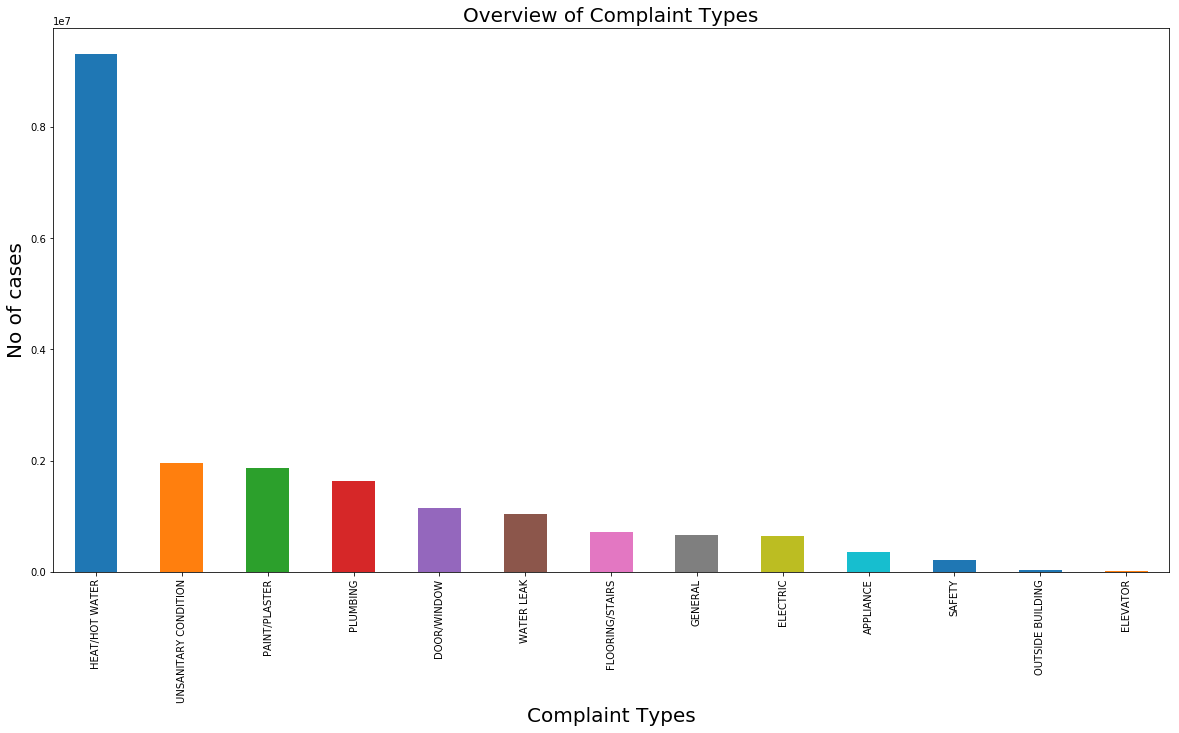

In [11]:
plt.figure(figsize=(20,10))
df4['complaint_type'].value_counts().plot.bar()
plt.xlabel('Complaint Types', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Overview of Complaint Types', size=20)

In [12]:
df4.isnull().sum()

complaint_type      0
incident_address    0
incident_zip        0
Address             0
NumBldgs            0
NumFloors           0
YearBuilt           0
YearAlter1          0
dtype: int64

In [9]:
df4.dropna(axis=0, inplace=True)

In [10]:
df4.isnull().sum()

complaint_type      0
incident_address    0
incident_zip        0
Address             0
NumBldgs            0
NumFloors           0
YearBuilt           0
YearAlter1          0
dtype: int64

In [11]:
df4.head(100)

,complaint_type,incident_address,incident_zip,Address,NumBldgs,NumFloors,YearBuilt,YearAlter1
0,SAFETY,488 EAST 163 STREET,10451,2441 3 AVENUE,2,5.0,1917,2008
1,SAFETY,488 EAST 163 STREET,10451,200 EAST 135 STREET,5,4.0,2000,0
2,SAFETY,488 EAST 163 STREET,10451,220 EAST 134 STREET,1,6.0,1955,0
3,SAFETY,488 EAST 163 STREET,10451,2417 3 AVENUE,1,8.0,1928,0
4,SAFETY,488 EAST 163 STREET,10451,2413 3 AVENUE,1,5.0,1931,0
5,SAFETY,488 EAST 163 STREET,10451,2403 3 AVENUE,1,5.0,1931,0
6,SAFETY,488 EAST 163 STREET,10451,2477 3 AVENUE,1,4.0,2013,2012
7,SAFETY,488 EAST 163 STREET,10451,246 EAST 137 STREET,2,1.0,1931,0
8,SAFETY,488 EAST 163 STREET,10451,242 EAST 137 STREET,1,3.0,1931,0
9,SAFETY,488 EAST 163 STREET,10451,248 EAST 137 STREET,1,1.0,1931,0


In [4]:
df4.drop(['Address','NumBldgs','YearAlter1','YearBuilt'], axis=1, inplace=True)

In [5]:
df4.head(100)

,complaint_type,incident_address,incident_zip,NumFloors
0,SAFETY,488 EAST 163 STREET,10451,5.0
1,SAFETY,488 EAST 163 STREET,10451,4.0
2,SAFETY,488 EAST 163 STREET,10451,6.0
3,SAFETY,488 EAST 163 STREET,10451,8.0
4,SAFETY,488 EAST 163 STREET,10451,5.0
5,SAFETY,488 EAST 163 STREET,10451,5.0
6,SAFETY,488 EAST 163 STREET,10451,4.0
7,SAFETY,488 EAST 163 STREET,10451,1.0
8,SAFETY,488 EAST 163 STREET,10451,3.0
9,SAFETY,488 EAST 163 STREET,10451,1.0


In [13]:
df4.drop_duplicates(inplace=True)

In [14]:
df4.shape

(6470207, 8)

In [15]:
plt.figure(figsize=(20,10))


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

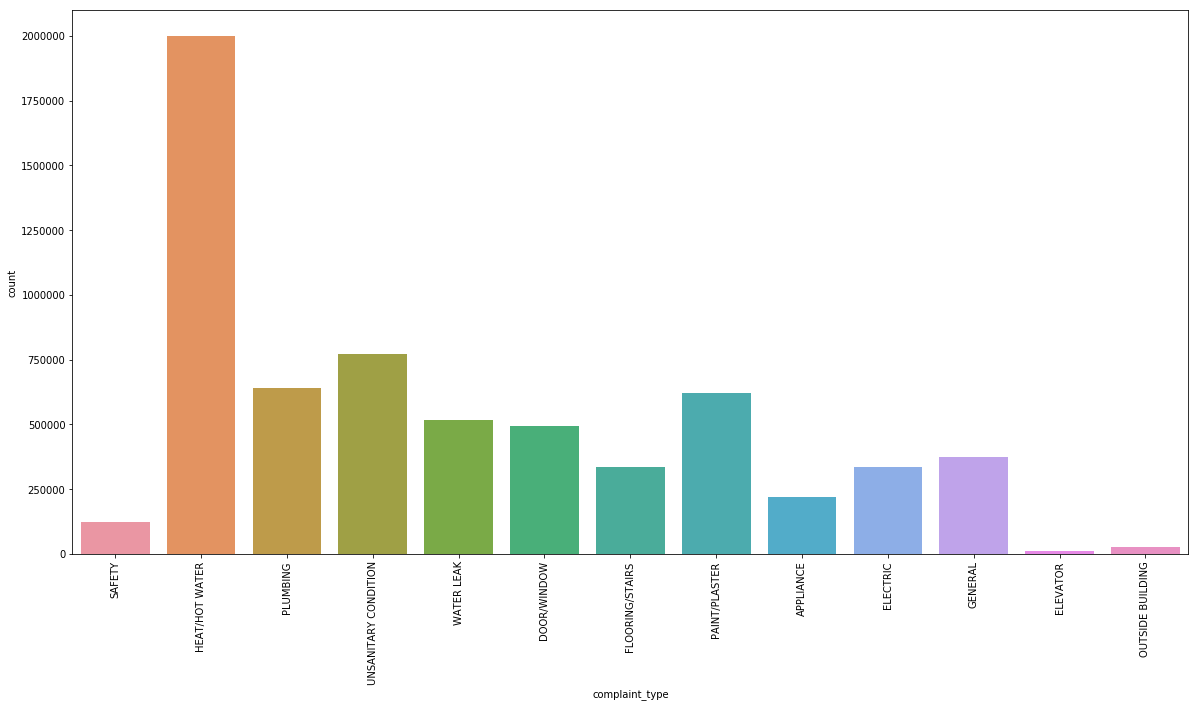

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x=df4.complaint_type)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

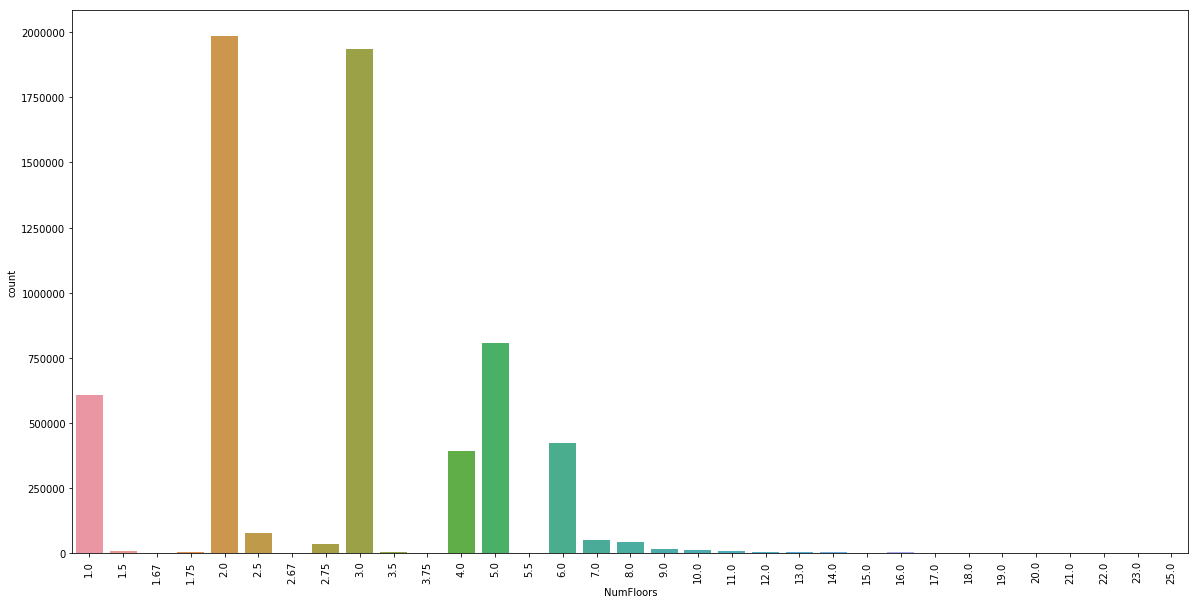

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x=df4.NumFloors)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

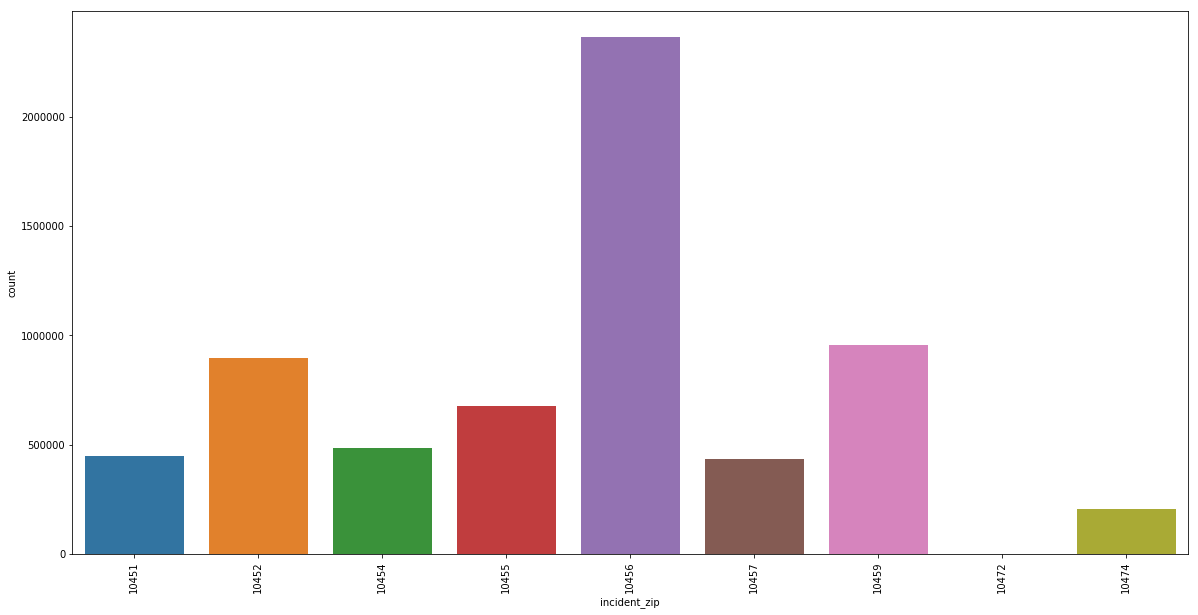

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x=df4.incident_zip)
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=df4.incident_zip,y=df4.NumFloors)

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=df4.complaint_type, y=df4.NumFloors)
plt.xticks(rotation=90)

In [ ]:
df4[(df4['complaint_type'] == 'HEAT/HOT WATER') & (df4['NumFloors'])]

In [ ]:
df4[(df4['complaint_type'] == 'HEAT/HOT WATER') & (df4['NumFloors'])].count()

In [19]:
#Any correlation?
stats = df4[df4['complaint_type'] == 'HEAT/HOT WATER'].groupby('NumFloors')
stats.count()

,complaint_type,incident_address,incident_zip
NumFloors,,,
1.00,1872,1872,1872
1.50,1273,1273,1273
1.67,351,351,351
1.75,425,425,425
2.00,1624,1624,1624
2.50,1624,1624,1624
2.67,346,346,346
2.75,1167,1167,1167
3.00,1624,1624,1624


In [ ]:
print("Association between Complain Types and NumFloors")
print(scipy.stats.pearsonr(df4['complaint_type'],df4['NumFloors']))

In [20]:
df4.corr()

,incident_zip,NumFloors
incident_zip,1.000000,-0.156568
NumFloors,-0.156568,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

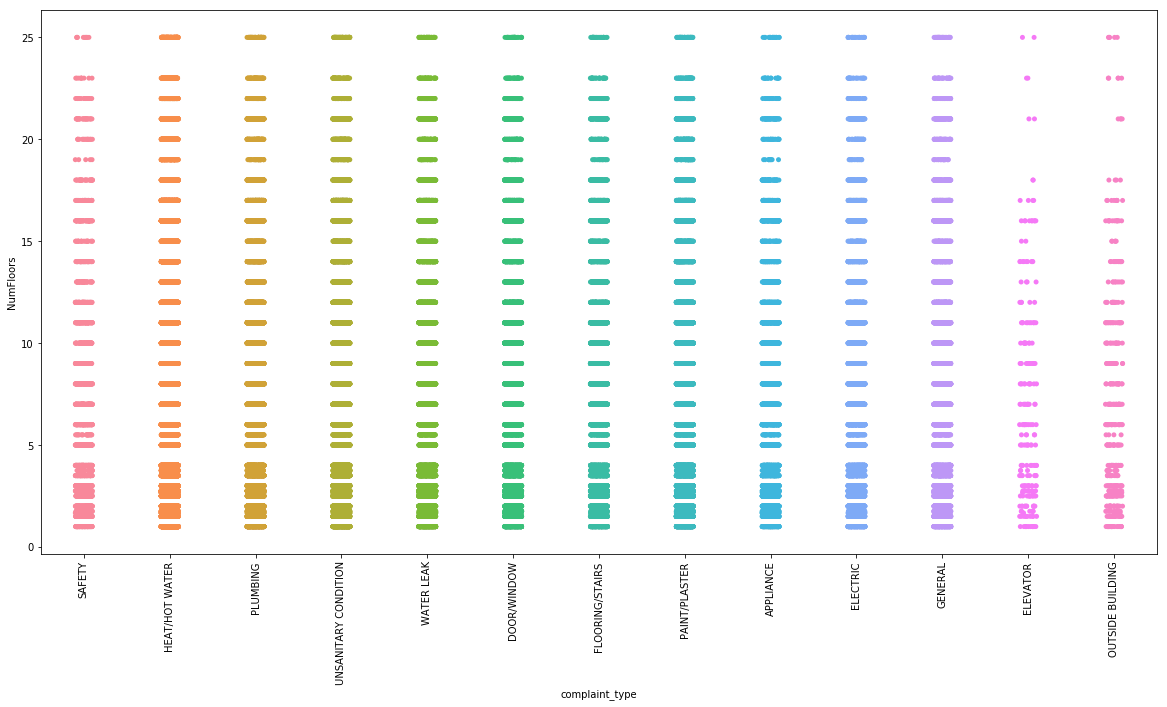

In [25]:
#More cramped below 5
plt.figure(figsize=(20,10))
sns.stripplot(x="complaint_type", y="NumFloors",data=df4,jitter=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

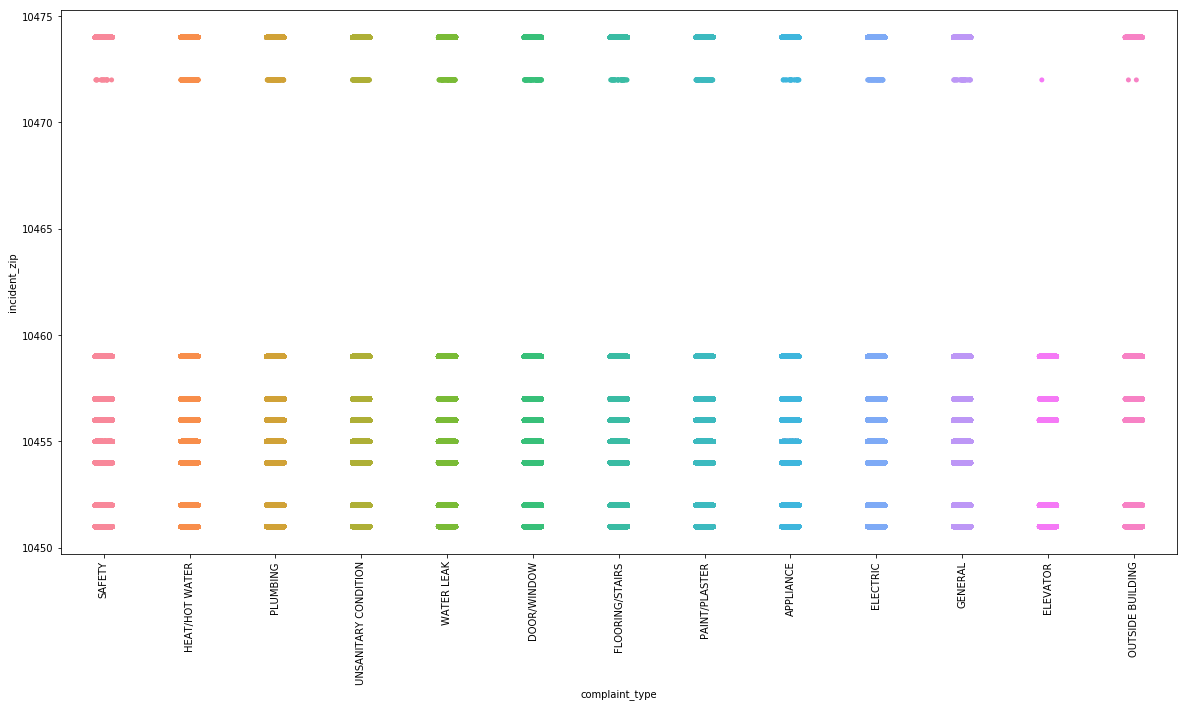

In [21]:
#Mostly concentrated on Zip Code 10455
plt.figure(figsize=(20,10))
sns.stripplot(x="complaint_type", y="incident_zip",data=df4,jitter=True,orient='v')
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df4.complaint_type=='HEAT/HOT WATER',y=df4.NumFloors)
plt.xticks(rotation=90)

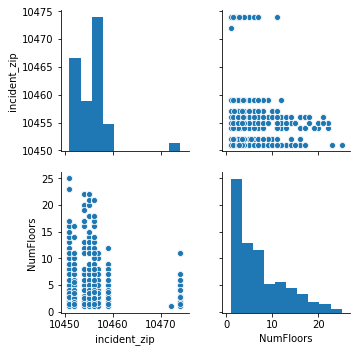

In [15]:
sns.pairplot(df4)

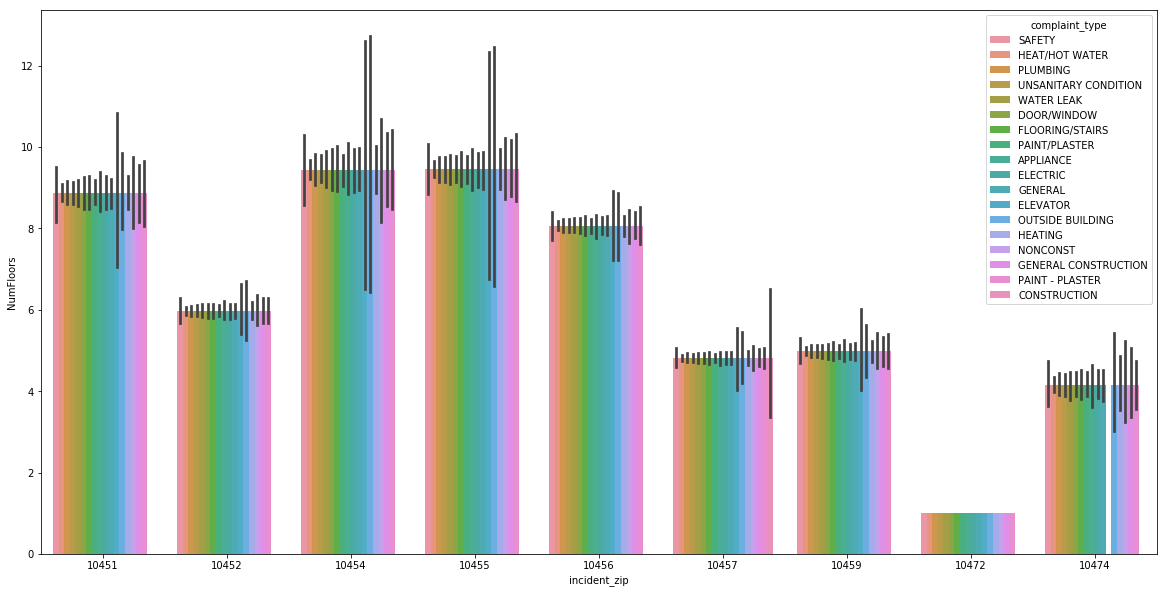

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(x=df4.incident_zip,y=df4.NumFloors, hue=df4.complaint_type)

In [18]:
df4.tail()

,complaint_type,incident_address,incident_zip,NumFloors
19608439,HEAT/HOT WATER,1000 SIMPSON STREET,10459,7.00
19608455,HEAT/HOT WATER,1000 SIMPSON STREET,10459,2.50
19608737,HEAT/HOT WATER,1000 SIMPSON STREET,10459,12.00
19608777,HEAT/HOT WATER,1000 SIMPSON STREET,10459,3.75
19608961,HEAT/HOT WATER,1000 SIMPSON STREET,10459,1.50


In [9]:
df5 = df4[:100000]

In [10]:
df5

,complaint_type,incident_address,incident_zip,NumFloors
0,SAFETY,488 EAST 163 STREET,10451,5.00
1,SAFETY,488 EAST 163 STREET,10451,4.00
2,SAFETY,488 EAST 163 STREET,10451,6.00
3,SAFETY,488 EAST 163 STREET,10451,8.00
7,SAFETY,488 EAST 163 STREET,10451,1.00
8,SAFETY,488 EAST 163 STREET,10451,3.00
31,SAFETY,488 EAST 163 STREET,10451,2.00
40,SAFETY,488 EAST 163 STREET,10451,13.00
42,SAFETY,488 EAST 163 STREET,10451,14.00
103,SAFETY,488 EAST 163 STREET,10451,9.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

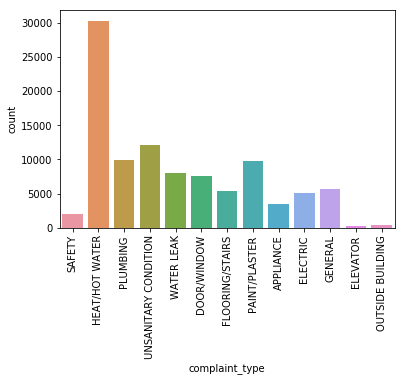

In [11]:
sns.countplot(x=df5.complaint_type)
plt.xticks(rotation=90)

In [12]:
#save
df5.to_csv("ML1.csv", index=False)